In [42]:
import pandas as pd
import statistics
from scipy.stats import iqr
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

info1_file = '/Users/m221138/RA_plasma_metabolites/data/patient_pred_mtx_info.csv'
info2_file = '/Users/m221138/RA_plasma_metabolites/data/pred_mtx_info.csv'

In [29]:
info1_df = pd.read_csv(info1_file)
info2_df = pd.read_csv(info2_file)

main_dict = {}
mcID_list = []
dose_dict = {}

In [30]:
info1_df.head()

,patientID,mcID,visit,mtx,pred
0,ST-00010415,2715364,1,yes,no
1,ST-00010415,2715364,2,yes,no
2,ST-00010421,3025155,1,yes,yes
3,ST-00010421,3025155,2,yes,yes
4,ST-00011458,2531748,1,no,no


In [31]:
info2_df.head()

,Mayo Clinic #,Visit Description,methotrexate,Dose of methotrexate: mg/week (00.0 to 25.0),Current medication: Prednisone,Current prednisone dose - mg/day (0 to 100)
0,3934846.0,1,no,NaN,no,NaN
1,3934846.0,2,no,NaN,no,NaN
2,7371882.0,1,yes,17.5,no,NaN
3,7371882.0,2,yes,15.0,no,NaN
4,6030991.0,1,no,NaN,no,NaN


In [32]:
r, c = info1_df.shape
for i in range(r):
    mcID = str(info1_df.iloc[i,1])
    
    if mcID not in mcID_list:
        mcID_list.append(mcID)
    visit = info1_df.iloc[i,2]
    mtx = info1_df.iloc[i,3]
    pred = info1_df.iloc[i,4]
    
    main_dict[mcID, visit,"mtx"] = mtx
    main_dict[mcID, visit,"pred"] = pred

In [33]:
print (mcID_list)

['2715364', '3025155', '2531748', '1952584', '1728881', '2953603', '2614934', '3709490', '3138082', '1751310', '2536175', '2509601', '3802693', '3430633', '1331643', '1903879', '2464972', '6340182', '4078806', '6397929', '3540375', '4364050', '7176849', '3609406', '3398103', '3425189', '2906656', '3984153', '1806113', '3430782', '6426164', '1890468', '2228154', '8347225', '7074390', '7181912', '3677416', '7318316', '5336919', '7441199', '7047170', '6481216', '9893262', '2227714', '4274053', '6084011', '3518596', '2418423', '6136285', '5435589', '7432029', '6125569', '6202830', '3384920', '1867679', '5380366', '8053229', '6306559', '7020550', '6134399', '3008126', '6112046', '6466177', '7450086']


In [34]:
r,c = info2_df.shape
mtx1_list = []
mtx2_list = []
pred1_list = []
pred2_list = []

for i in range(r):
    mcID = str(info2_df.iloc[i,0])
    mcID = mcID.replace('.0','')
    print (mcID)
    visit = info2_df.iloc[i,1]
    mtx_status = info2_df.iloc[i,2]
    mtx_value = info2_df.iloc[i,3]
    
    pred_status = info2_df.iloc[i,4]
    pred_value = info2_df.iloc[i,5]
    if mcID in mcID_list:
        if mtx_status == "yes":
            if visit == '1':
    #             print (visit)
                dose_dict[mcID, visit, "mtx"] = mtx_value
                mtx1_list.append(mtx_value)
            if visit == '2':
    #             print (visit)
                dose_dict[mcID, visit, "mtx"] = mtx_value
                mtx2_list.append(mtx_value)

        if pred_status == "yes":
            dose_dict[mcID, visit, "pred"] = pred_value
            if visit == '1':
                dose_dict[mcID, visit, "pred"] = pred_value
                pred1_list.append(pred_value)
            if visit == '2':
                dose_dict[mcID, visit, "pred"] = pred_value
                pred2_list.append(pred_value)    

3934846
3934846
7371882
7371882
6030991
6030991
3398103
3398103
6153496
6153496
2124574
2124574
3430782
3430782
2919944
2919944
2506036
2506036
3138082
3138082
5461550
5461550
7176849
7176849
6177510
6177510
1890468
1890468
7369161
7369161
1728881
1728881
3677878
3677878
2228154
2228154
1806113
1806113
6331381
6331381
3595718
3595718
4364050
4364050
3425189
3425189
2536175
2536175
8347225
8347225
3022689
3022689
3585517
3585517
4322145
4322145
6397929
6397929
6346035
6346035
7074390
7074390
8681310
8681310
4247079
4247079
2198192
2198192
4392650
4392650
6426164
6426164
2906656
2906656
3084246
3084246
3677416
3677416
2509601
2509601
7318316
7318316
4445004
4445004
5336919
5336919
2464972
2464972
1903879
1903879
5008549
5008549
7441199
7441199
6340182
6340182
7313947
7313947
3609406
3609406
4176996
4176996
4176996
2690869
2690869
7047170
7047170
4305931
4305931
1050960
1050960
6481216
6481216
6084011
6084011
2953603
2953603
9893262
9893262
2227714
2227714
2227714
2262245
2262245
4274053


[2.5, 10.0, 10.0, 10.0, 10.0, 10.0, 12.5, 12.5, 12.5, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 17.5, 17.5, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 22.5, 22.5, 22.5, 22.5, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0]
[10.0, 10.0, 12.5, 12.5, 12.5, 12.5, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 17.5, 17.5, 17.5, 17.5, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 22.5, 22.5, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0]
48
49


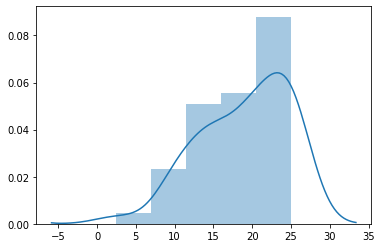

In [43]:
# print (len(mtx1_list))
# print (mtx1_list)
# print (len(mtx2_list))
# print (mtx2_list)
# print (len(pred1_list))
# print (pred1_list)
# print (len(pred2_list))
# print (pred2_list)

# mtx1_list.sort()
# mtx2_list.sort()

print (mtx1_list)
print (mtx2_list)
print (len(mtx1_list))
print (len(mtx2_list))



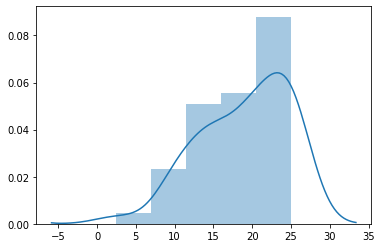

In [45]:
sns.distplot(mtx1_list)

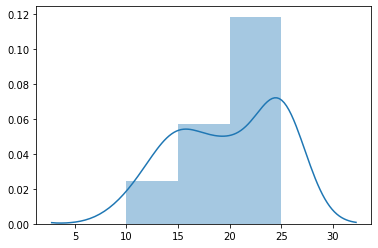

In [44]:
sns.distplot(mtx2_list)

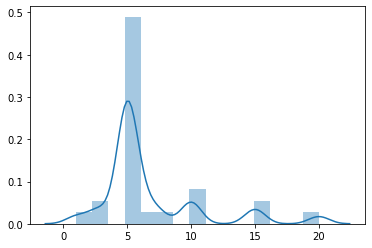

In [47]:
sns.distplot(pred1_list)

In [49]:
print (pred2_list)

[5.0, 5.0, 5.0, 3.0, 5.0, 2.5, 6.0, 5.0, 5.0, 15.0, 5.0, 7.0, 5.0, 3.0, 7.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 2.5, 5.0, 5.0, 5.0, 5.0, 10.0, 5.0, 5.0]


In [46]:
print ("MTX visit 1")
print ("size:", len(mtx1_list))
print (statistics.median(mtx1_list))
print (statistics.mean(mtx1_list))
print ("1st qt: ",numpy.quantile(mtx1_list, .25))
print ("3rd qt: ",numpy.quantile(mtx1_list, .75))
print(iqr(mtx1_list, rng=(25,75), interpolation='midpoint'))

print ("MTX visit 2")
print ("size:", len(mtx2_list))
print (statistics.median(mtx2_list))
print (statistics.mean(mtx2_list))
print ("1st qt: ",numpy.quantile(mtx2_list, .25))
print ("3rd qt: ",numpy.quantile(mtx2_list, .75))
print(iqr(mtx2_list, rng=(25,75), interpolation='midpoint'))

print ("PRED visit 1")
print ("size:", len(pred1_list))
# print (pred1_list)
print (statistics.median(pred1_list))
print(iqr(pred1_list, rng=(25,75), interpolation='midpoint'))
print ("1st qt: ",numpy.quantile(pred1_list, .25))
print ("3rd qt: ",numpy.quantile(pred1_list, .75))

print ("PRED visit 2")
print ("size:", len(pred2_list))
# print (pred2_list)
print (statistics.median(pred2_list))
print (iqr(pred2_list, rng=(25,75), interpolation='midpoint'))
print ("1st qt: ",numpy.quantile(pred2_list, .25))
print ("3rd qt: ",numpy.quantile(pred2_list, .75))


MTX visit 1
size: 48
20.0
18.958333333333332
1st qt:  15.0
3rd qt:  25.0
10.0
MTX visit 2
size: 49
20.0
19.79591836734694
1st qt:  15.0
3rd qt:  25.0
10.0
PRED visit 1
size: 29
5.0
2.0
1st qt:  5.0
3rd qt:  7.0
PRED visit 2
size: 29
5.0
0.0
1st qt:  5.0
3rd qt:  5.0
